In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

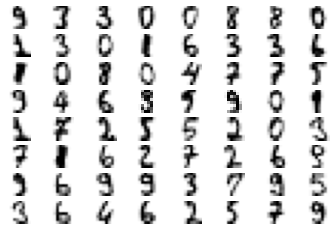

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

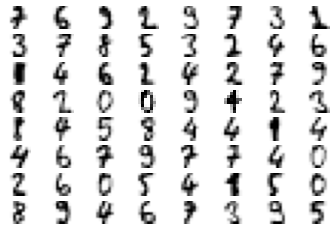

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.10110 stdev: 0.03781
Best fitness: 0.21212 - size: (10, 64) - species 4 - id 38
Average adjusted fitness: 0.096
Mean genetic distance 2.857, standard deviation 0.318
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 23.640 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.10643 stdev: 0.04067
Best fitness: 0.21212 - size: (10, 64) - species 4 - id 38
Average adjusted fitness: 0.101
Mean genetic distance 2.937, standard deviation 0.330
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 35.703 sec (29.672 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.11763 stdev: 0.03805
Best fitness: 0.21212 - size: (10, 64) - species 4 - id 38
Average adjusted fitness: 0.104
Mean genetic distance 2.953, standard deviation 0.348
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 50.631 sec (36.6

Population's average fitness: 0.16623 stdev: 0.05634
Best fitness: 0.28015 - size: (12, 66) - species 35 - id 1891
Average adjusted fitness: 0.147
Mean genetic distance 3.171, standard deviation 0.388
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 47.719 sec (40.650 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.17114 stdev: 0.05346
Best fitness: 0.28015 - size: (12, 66) - species 35 - id 1891
Average adjusted fitness: 0.147
Mean genetic distance 3.180, standard deviation 0.400
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 47.206 sec (41.732 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.17004 stdev: 0.05446
Best fitness: 0.28015 - size: (12, 66) - species 35 - id 1891
Average adjusted fitness: 0.134
Mean genetic distance 3.170, standard deviation 0.400
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 45.472 sec (42.624 average)

Population's average fitness: 0.17705 stdev: 0.05984
Best fitness: 0.33395 - size: (14, 69) - species 43 - id 3653
Average adjusted fitness: 0.162
Mean genetic distance 3.182, standard deviation 0.502
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 55.069 sec (55.653 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17384 stdev: 0.06097
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.141
Mean genetic distance 3.201, standard deviation 0.497
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 56.716 sec (56.464 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17350 stdev: 0.06185
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.156
Mean genetic distance 3.232, standard deviation 0.506
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 57.803 sec (56.976 average)

Population's average fitness: 0.18096 stdev: 0.06420
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.133
Mean genetic distance 3.105, standard deviation 0.528
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 59.106 sec (58.711 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18141 stdev: 0.06494
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.154
Mean genetic distance 3.103, standard deviation 0.528
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 60.009 sec (58.732 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18353 stdev: 0.06343
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.164
Mean genetic distance 3.119, standard deviation 0.512
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 60.267 sec (58.834 average)

Population's average fitness: 0.20288 stdev: 0.07506
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.128
Mean genetic distance 3.098, standard deviation 0.586
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 52.937 sec (53.601 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.20115 stdev: 0.06988
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.142
Mean genetic distance 3.113, standard deviation 0.580
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 53.540 sec (53.629 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.20212 stdev: 0.06856
Best fitness: 0.37910 - size: (16, 72) - species 40 - id 6649
Average adjusted fitness: 0.142
Mean genetic distance 3.127, standard deviation 0.558
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 61.548 sec (54.285 average)

Population's average fitness: 0.17648 stdev: 0.06918
Best fitness: 0.39641 - size: (16, 68) - species 43 - id 16560
Average adjusted fitness: 0.144
Mean genetic distance 2.963, standard deviation 0.589
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.131 sec (62.348 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.17390 stdev: 0.06949
Best fitness: 0.39641 - size: (16, 68) - species 43 - id 16560
Average adjusted fitness: 0.147
Mean genetic distance 2.968, standard deviation 0.591
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.702 sec (62.313 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.17896 stdev: 0.07016
Best fitness: 0.39641 - size: (16, 68) - species 43 - id 16560
Average adjusted fitness: 0.160
Mean genetic distance 2.947, standard deviation 0.574
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.966 sec (62.256 averag

Population's average fitness: 0.18172 stdev: 0.06845
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.140
Mean genetic distance 2.934, standard deviation 0.602
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 63.186 sec (64.193 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.18066 stdev: 0.07110
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.127
Mean genetic distance 2.921, standard deviation 0.647
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 64.619 sec (64.193 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.18282 stdev: 0.07169
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.130
Mean genetic distance 2.961, standard deviation 0.601
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 65.421 sec (64.292 averag

Population's average fitness: 0.18918 stdev: 0.07406
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.156
Mean genetic distance 2.938, standard deviation 0.490
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 65.842 sec (66.423 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.19162 stdev: 0.08014
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.177
Mean genetic distance 2.943, standard deviation 0.481
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 66.893 sec (66.356 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.18827 stdev: 0.07349
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.162
Mean genetic distance 2.964, standard deviation 0.493
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 67.057 sec (66.359 ave

Population's average fitness: 0.19302 stdev: 0.07802
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.144
Mean genetic distance 3.007, standard deviation 0.478
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 67.650 sec (65.490 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.19910 stdev: 0.07416
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.158
Mean genetic distance 3.011, standard deviation 0.478
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 68.137 sec (65.826 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.19995 stdev: 0.07486
Best fitness: 0.40940 - size: (24, 87) - species 56 - id 21636
Average adjusted fitness: 0.134
Mean genetic distance 2.999, standard deviation 0.501
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 66.879 sec (66.052 ave

Population's average fitness: 0.19484 stdev: 0.07769
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.141
Mean genetic distance 2.974, standard deviation 0.546
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 70.469 sec (69.377 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.19168 stdev: 0.07721
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.144
Mean genetic distance 2.994, standard deviation 0.535
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 71.570 sec (69.568 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.19030 stdev: 0.07588
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.103
Mean genetic distance 3.016, standard deviation 0.521
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 69.775 sec (69.716 ave

Population's average fitness: 0.20593 stdev: 0.07677
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.167
Mean genetic distance 2.963, standard deviation 0.544
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 68.814 sec (70.725 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.21044 stdev: 0.07952
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.133
Mean genetic distance 2.989, standard deviation 0.563
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 70.826 sec (70.579 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.20823 stdev: 0.07695
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.151
Mean genetic distance 2.973, standard deviation 0.580
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 71.692 sec (70.560 ave

Population's average fitness: 0.19291 stdev: 0.07999
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.171
Mean genetic distance 2.779, standard deviation 0.536
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 68.163 sec (69.678 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.19330 stdev: 0.07894
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.159
Mean genetic distance 2.779, standard deviation 0.522
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 70.018 sec (69.635 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.19641 stdev: 0.07453
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.126
Mean genetic distance 2.769, standard deviation 0.523
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 69.003 sec (69.509 averag

Population's average fitness: 0.21636 stdev: 0.07430
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.163
Mean genetic distance 2.788, standard deviation 0.522
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.019 sec (75.454 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.20926 stdev: 0.07924
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.157
Mean genetic distance 2.782, standard deviation 0.534
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.264 sec (75.423 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.20373 stdev: 0.08331
Best fitness: 0.41435 - size: (23, 70) - species 84 - id 36262
Average adjusted fitness: 0.187
Mean genetic distance 2.771, standard deviation 0.571
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 74.053 sec (75.133 avera

Population's average fitness: 0.19968 stdev: 0.07581
Best fitness: 0.43476 - size: (26, 76) - species 107 - id 50018
Average adjusted fitness: 0.162
Mean genetic distance 2.681, standard deviation 0.477
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 74.621 sec (62.947 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.20247 stdev: 0.07650
Best fitness: 0.43476 - size: (26, 76) - species 107 - id 50018
Average adjusted fitness: 0.165
Mean genetic distance 2.646, standard deviation 0.486
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 73.123 sec (64.064 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.19826 stdev: 0.07688
Best fitness: 0.43476 - size: (26, 76) - species 107 - id 50018
Average adjusted fitness: 0.169
Mean genetic distance 2.640, standard deviation 0.492
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 74.814 sec (65.287 av

Population's average fitness: 0.20084 stdev: 0.08178
Best fitness: 0.45764 - size: (27, 76) - species 107 - id 56062
Average adjusted fitness: 0.163
Mean genetic distance 2.589, standard deviation 0.449
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 76.898 sec (74.909 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.20101 stdev: 0.07965
Best fitness: 0.45764 - size: (27, 76) - species 107 - id 56062
Average adjusted fitness: 0.146
Mean genetic distance 2.592, standard deviation 0.459
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 75.092 sec (75.033 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.20496 stdev: 0.08280
Best fitness: 0.45764 - size: (27, 76) - species 107 - id 56062
Average adjusted fitness: 0.179
Mean genetic distance 2.607, standard deviation 0.430
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 73.707 sec (74.919 ave

Population's average fitness: 0.19150 stdev: 0.07678
Best fitness: 0.47681 - size: (28, 80) - species 107 - id 60827
Average adjusted fitness: 0.149
Mean genetic distance 2.568, standard deviation 0.408
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 75.267 sec (76.506 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.19448 stdev: 0.07794
Best fitness: 0.47681 - size: (28, 80) - species 107 - id 60827
Average adjusted fitness: 0.147
Mean genetic distance 2.520, standard deviation 0.446
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 76.027 sec (76.411 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.19192 stdev: 0.07593
Best fitness: 0.47681 - size: (28, 80) - species 107 - id 60827
Average adjusted fitness: 0.146
Mean genetic distance 2.538, standard deviation 0.407
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 75.174 sec (76.151 ave

Population's average fitness: 0.19632 stdev: 0.07847
Best fitness: 0.47681 - size: (28, 80) - species 107 - id 60827
Average adjusted fitness: 0.141
Mean genetic distance 2.618, standard deviation 0.443
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 78.882 sec (77.653 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.21403 stdev: 0.08044
Best fitness: 0.47681 - size: (28, 80) - species 107 - id 60827
Average adjusted fitness: 0.192
Mean genetic distance 2.623, standard deviation 0.438
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 77.987 sec (77.722 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.21062 stdev: 0.08046
Best fitness: 0.47681 - size: (28, 80) - species 107 - id 60827
Average adjusted fitness: 0.177
Mean genetic distance 2.640, standard deviation 0.450
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 78.761 sec (77.903 

Mean genetic distance 2.543, standard deviation 0.413
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 67.364 sec (80.534 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.20561 stdev: 0.08504
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.183
Mean genetic distance 2.559, standard deviation 0.399
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 67.446 sec (78.651 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.20137 stdev: 0.08634
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.128
Mean genetic distance 2.548, standard deviation 0.402
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 67.804 sec (77.062 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.21172 stdev: 0.08114
Best fitness: 0.48609 - size: (29, 78) - species 

Population's average fitness: 0.20185 stdev: 0.08311
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.172
Mean genetic distance 2.525, standard deviation 0.380
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 79.835 sec (80.349 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.20901 stdev: 0.08596
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.187
Mean genetic distance 2.528, standard deviation 0.379
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 81.913 sec (80.724 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.21070 stdev: 0.09069
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.187
Mean genetic distance 2.543, standard deviation 0.367
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 82.896 sec (81.237 ave

Population's average fitness: 0.21972 stdev: 0.08550
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.173
Mean genetic distance 2.455, standard deviation 0.400
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 80.878 sec (80.697 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.21176 stdev: 0.07936
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.153
Mean genetic distance 2.415, standard deviation 0.424
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 79.857 sec (80.697 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20401 stdev: 0.09150
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.158
Mean genetic distance 2.424, standard deviation 0.417
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 78.006 sec (80.341 ave

Population's average fitness: 0.18902 stdev: 0.07861
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.152
Mean genetic distance 2.754, standard deviation 0.447
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 63.283 sec (63.270 average)

 ****** Running generation 480 ****** 

Population's average fitness: 0.19103 stdev: 0.08410
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.158
Mean genetic distance 2.763, standard deviation 0.452
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 61.324 sec (63.145 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.19170 stdev: 0.08438
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.170
Mean genetic distance 2.729, standard deviation 0.501
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.614 sec (62.971 ave

Mean genetic distance 2.869, standard deviation 0.521
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 63.601 sec (62.548 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.20915 stdev: 0.08388
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.167
Mean genetic distance 2.870, standard deviation 0.512
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 62.646 sec (62.796 average)

 ****** Running generation 504 ****** 

Population's average fitness: 0.20955 stdev: 0.08685
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.175
Mean genetic distance 2.856, standard deviation 0.527
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 63.238 sec (62.801 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.21035 stdev: 0.08430
Best fitness: 0.48609 - size: (29, 78) - speci

Population's average fitness: 0.20988 stdev: 0.08558
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.161
Mean genetic distance 2.784, standard deviation 0.546
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 64.649 sec (65.366 average)

 ****** Running generation 527 ****** 

Population's average fitness: 0.20885 stdev: 0.08883
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.189
Mean genetic distance 2.799, standard deviation 0.533
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 64.850 sec (65.166 average)

 ****** Running generation 528 ****** 

Population's average fitness: 0.22107 stdev: 0.08668
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.144
Mean genetic distance 2.796, standard deviation 0.533
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 64.641 sec (65.036 ave

Population's average fitness: 0.20267 stdev: 0.08444
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.141
Mean genetic distance 2.714, standard deviation 0.509
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 55.865 sec (62.900 average)

 ****** Running generation 551 ****** 

Population's average fitness: 0.20599 stdev: 0.08610
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.160
Mean genetic distance 2.702, standard deviation 0.508
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 67.129 sec (63.094 average)

 ****** Running generation 552 ****** 

Population's average fitness: 0.20417 stdev: 0.08587
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.177
Mean genetic distance 2.700, standard deviation 0.502
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 59.705 sec (62.601 ave

Population's average fitness: 0.21710 stdev: 0.08627
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.186
Mean genetic distance 2.667, standard deviation 0.484
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 74.197 sec (72.882 average)

 ****** Running generation 575 ****** 

Population's average fitness: 0.22264 stdev: 0.08895
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.179
Mean genetic distance 2.699, standard deviation 0.440
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 75.612 sec (73.319 average)

 ****** Running generation 576 ****** 

Population's average fitness: 0.21320 stdev: 0.08994
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.171
Mean genetic distance 2.716, standard deviation 0.431
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 74.803 sec (73.598 

Population's average fitness: 0.20593 stdev: 0.08342
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.148
Mean genetic distance 2.657, standard deviation 0.463
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 71.808 sec (72.462 average)

 ****** Running generation 599 ****** 

Population's average fitness: 0.21390 stdev: 0.08251
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.156
Mean genetic distance 2.638, standard deviation 0.477
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 70.102 sec (72.159 average)

 ****** Running generation 600 ****** 

Population's average fitness: 0.20710 stdev: 0.08586
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.182
Mean genetic distance 2.623, standard deviation 0.475
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 72.471 sec (72.071 ave

Population's average fitness: 0.21355 stdev: 0.09022
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.189
Mean genetic distance 2.719, standard deviation 0.436
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 72.795 sec (72.503 average)

 ****** Running generation 623 ****** 

Population's average fitness: 0.21603 stdev: 0.08670
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.146
Mean genetic distance 2.693, standard deviation 0.447
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 73.078 sec (72.202 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.20760 stdev: 0.08924
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.173
Mean genetic distance 2.706, standard deviation 0.438
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 71.861 sec (72.339 

Population's average fitness: 0.20124 stdev: 0.08974
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.176
Mean genetic distance 2.811, standard deviation 0.431
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 73.333 sec (71.929 average)

 ****** Running generation 647 ****** 

Population's average fitness: 0.21034 stdev: 0.08289
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.158
Mean genetic distance 2.805, standard deviation 0.420
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 72.423 sec (72.061 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.19583 stdev: 0.08632
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.166
Mean genetic distance 2.802, standard deviation 0.433
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 72.683 sec (72.099 

Mean genetic distance 2.670, standard deviation 0.477
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 70.926 sec (73.889 average)

 ****** Running generation 670 ****** 

Population's average fitness: 0.20391 stdev: 0.08564
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.177
Mean genetic distance 2.674, standard deviation 0.478
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 70.143 sec (73.387 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.20360 stdev: 0.08748
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.157
Mean genetic distance 2.674, standard deviation 0.460
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 73.467 sec (73.204 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.20593 stdev: 0.08446
Best fitness: 0.48609 - size: (29, 78) - species 

Population's average fitness: 0.20863 stdev: 0.08735
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.172
Mean genetic distance 2.860, standard deviation 0.545
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 65.553 sec (65.870 average)

 ****** Running generation 694 ****** 

Population's average fitness: 0.20866 stdev: 0.08093
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.151
Mean genetic distance 2.883, standard deviation 0.514
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 64.053 sec (65.530 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.20592 stdev: 0.08165
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.181
Mean genetic distance 2.882, standard deviation 0.509
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 65.450 sec (65.359 a

Population's average fitness: 0.20387 stdev: 0.08230
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.162
Mean genetic distance 2.859, standard deviation 0.511
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 68.052 sec (67.658 average)

 ****** Running generation 718 ****** 

Population's average fitness: 0.20681 stdev: 0.07885
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.121
Mean genetic distance 2.850, standard deviation 0.531
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 67.268 sec (67.512 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.21725 stdev: 0.08570
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.167
Mean genetic distance 2.844, standard deviation 0.545
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 67.935 sec (67.593 

Mean genetic distance 2.845, standard deviation 0.521
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 69.235 sec (68.351 average)

 ****** Running generation 741 ****** 

Population's average fitness: 0.21598 stdev: 0.08505
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.164
Mean genetic distance 2.790, standard deviation 0.576
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 68.159 sec (68.320 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.21628 stdev: 0.08642
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.202
Mean genetic distance 2.808, standard deviation 0.581
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 68.695 sec (68.397 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.21850 stdev: 0.07947
Best fitness: 0.48609 - size: (29, 78) - species 

Population's average fitness: 0.22493 stdev: 0.09200
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.159
Mean genetic distance 2.827, standard deviation 0.484
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 70.587 sec (70.206 average)

 ****** Running generation 765 ****** 

Population's average fitness: 0.22264 stdev: 0.09129
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.185
Mean genetic distance 2.854, standard deviation 0.498
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 69.931 sec (70.207 average)

 ****** Running generation 766 ****** 

Population's average fitness: 0.22042 stdev: 0.09423
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.178
Mean genetic distance 2.826, standard deviation 0.504
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 70.133 sec (70.172 

Mean genetic distance 2.829, standard deviation 0.521
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 66.292 sec (67.855 average)

 ****** Running generation 788 ****** 

Population's average fitness: 0.20658 stdev: 0.08927
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.145
Mean genetic distance 2.850, standard deviation 0.519
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 68.502 sec (67.781 average)

 ****** Running generation 789 ****** 

Population's average fitness: 0.22092 stdev: 0.09047
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.175
Mean genetic distance 2.822, standard deviation 0.554
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 69.566 sec (67.938 average)

 ****** Running generation 790 ****** 

Population's average fitness: 0.22265 stdev: 0.09462
Best fitness: 0.48609 - size: (29, 78) - species 

Population's average fitness: 0.21424 stdev: 0.08875
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.172
Mean genetic distance 2.815, standard deviation 0.511
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 74.115 sec (73.779 average)

 ****** Running generation 812 ****** 

Population's average fitness: 0.22452 stdev: 0.08543
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.203
Mean genetic distance 2.836, standard deviation 0.497
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 74.705 sec (74.095 average)

 ****** Running generation 813 ****** 

Population's average fitness: 0.22912 stdev: 0.08627
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.151
Mean genetic distance 2.852, standard deviation 0.492
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 74.178 sec (74.171 a

Population's average fitness: 0.21162 stdev: 0.08522
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.169
Mean genetic distance 2.883, standard deviation 0.657
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 74.616 sec (76.211 average)

 ****** Running generation 836 ****** 

Population's average fitness: 0.20659 stdev: 0.08851
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.173
Mean genetic distance 2.591, standard deviation 0.691
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 74.386 sec (75.908 average)

 ****** Running generation 837 ****** 

Population's average fitness: 0.21775 stdev: 0.07955
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.175
Mean genetic distance 2.623, standard deviation 0.670
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 72.745 sec (75.366 ave

Population's average fitness: 0.20978 stdev: 0.09282
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.202
Mean genetic distance 2.901, standard deviation 0.537
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 75.922 sec (76.537 average)

 ****** Running generation 860 ****** 

Population's average fitness: 0.21221 stdev: 0.09036
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.195
Mean genetic distance 2.892, standard deviation 0.531
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 76.253 sec (76.664 average)

 ****** Running generation 861 ****** 

Population's average fitness: 0.21919 stdev: 0.09258
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.211
Mean genetic distance 2.912, standard deviation 0.543
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 75.764 sec (76.532 

Mean genetic distance 2.870, standard deviation 0.586
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 78.304 sec (78.629 average)

 ****** Running generation 883 ****** 

Population's average fitness: 0.21789 stdev: 0.08888
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.181
Mean genetic distance 2.861, standard deviation 0.588
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 77.785 sec (78.538 average)

 ****** Running generation 884 ****** 

Population's average fitness: 0.21081 stdev: 0.09137
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.184
Mean genetic distance 2.877, standard deviation 0.585
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 79.440 sec (78.616 average)

 ****** Running generation 885 ****** 

Population's average fitness: 0.21261 stdev: 0.09188
Best fitness: 0.48609 - size: (29, 78) - species 

Population's average fitness: 0.19809 stdev: 0.08643
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.161
Mean genetic distance 2.894, standard deviation 0.587
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 74.516 sec (73.732 average)

 ****** Running generation 907 ****** 

Population's average fitness: 0.18913 stdev: 0.08440
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.151
Mean genetic distance 2.852, standard deviation 0.623
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 72.944 sec (73.810 average)

 ****** Running generation 908 ****** 

Population's average fitness: 0.18686 stdev: 0.08186
Best fitness: 0.48609 - size: (29, 78) - species 107 - id 70422
Average adjusted fitness: 0.163
Mean genetic distance 2.839, standard deviation 0.634
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 75.114 sec (74.205 ave

Mean genetic distance 2.876, standard deviation 0.498
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 76.833 sec (78.151 average)

 ****** Running generation 930 ****** 

Population's average fitness: 0.20710 stdev: 0.08655
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.145
Mean genetic distance 2.876, standard deviation 0.499
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 76.031 sec (77.814 average)

 ****** Running generation 931 ****** 

Population's average fitness: 0.21292 stdev: 0.08914
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.179
Mean genetic distance 2.898, standard deviation 0.523
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 76.807 sec (77.346 average)

 ****** Running generation 932 ****** 

Population's average fitness: 0.19701 stdev: 0.08614
Best fitness: 0.49969 - size: (30, 73) - spe

Population's average fitness: 0.21399 stdev: 0.08204
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.151
Mean genetic distance 2.906, standard deviation 0.580
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 79.216 sec (79.516 average)

 ****** Running generation 954 ****** 

Population's average fitness: 0.21302 stdev: 0.08457
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.178
Mean genetic distance 2.896, standard deviation 0.577
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 78.106 sec (79.261 average)

 ****** Running generation 955 ****** 

Population's average fitness: 0.20523 stdev: 0.08664
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.162
Mean genetic distance 2.940, standard deviation 0.566
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 79.511 sec (79.430 

Mean genetic distance 2.868, standard deviation 0.561
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 82.719 sec (81.273 average)

 ****** Running generation 977 ****** 

Population's average fitness: 0.21702 stdev: 0.08789
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.195
Mean genetic distance 2.874, standard deviation 0.569
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 82.377 sec (81.189 average)

 ****** Running generation 978 ****** 

Population's average fitness: 0.21928 stdev: 0.08537
Best fitness: 0.49969 - size: (30, 73) - species 107 - id 163526
Average adjusted fitness: 0.173
Mean genetic distance 2.867, standard deviation 0.573
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 83.109 sec (81.432 average)

 ****** Running generation 979 ****** 

Population's average fitness: 0.22135 stdev: 0.08677
Best fitness: 0.49969 - size: (30, 73) - spe

Population's average fitness: 0.19458 stdev: 0.08429
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.180
Mean genetic distance 2.440, standard deviation 0.430
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 72.185 sec (74.604 average)

 ****** Running generation 1001 ****** 

Population's average fitness: 0.19607 stdev: 0.07947
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.145
Mean genetic distance 2.427, standard deviation 0.435
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 73.109 sec (74.301 average)

 ****** Running generation 1002 ****** 

Population's average fitness: 0.20130 stdev: 0.08117
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.159
Mean genetic distance 2.424, standard deviation 0.413
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 71.220 sec (73.40

Mean genetic distance 2.663, standard deviation 0.431
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 77.998 sec (77.106 average)

 ****** Running generation 1024 ****** 

Population's average fitness: 0.21152 stdev: 0.08518
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.200
Mean genetic distance 2.680, standard deviation 0.414
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 79.849 sec (77.393 average)

 ****** Running generation 1025 ****** 

Population's average fitness: 0.21233 stdev: 0.08431
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.180
Mean genetic distance 2.673, standard deviation 0.434
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 76.726 sec (77.352 average)

 ****** Running generation 1026 ****** 

Population's average fitness: 0.21359 stdev: 0.08341
Best fitness: 0.49969 - size: (30, 73) - 

Population's average fitness: 0.20961 stdev: 0.07883
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.165
Mean genetic distance 2.545, standard deviation 0.435
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 81.032 sec (79.376 average)

 ****** Running generation 1048 ****** 

Population's average fitness: 0.21318 stdev: 0.08363
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.196
Mean genetic distance 2.570, standard deviation 0.424
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 85.445 sec (79.994 average)

 ****** Running generation 1049 ****** 

Population's average fitness: 0.21224 stdev: 0.08034
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.180
Mean genetic distance 2.569, standard deviation 0.420
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 82.396 sec (80.12

Mean genetic distance 2.586, standard deviation 0.398
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 89.015 sec (89.320 average)

 ****** Running generation 1071 ****** 

Population's average fitness: 0.20422 stdev: 0.08444
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.180
Mean genetic distance 2.612, standard deviation 0.381
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 87.354 sec (88.931 average)

 ****** Running generation 1072 ****** 

Population's average fitness: 0.19527 stdev: 0.08435
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.168
Mean genetic distance 2.620, standard deviation 0.382
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 88.029 sec (88.602 average)

 ****** Running generation 1073 ****** 

Population's average fitness: 0.20857 stdev: 0.08463
Best fitness: 0.49969 - size: (30, 73) - spe

Population's average fitness: 0.21019 stdev: 0.08579
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.161
Mean genetic distance 2.491, standard deviation 0.470
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 86.438 sec (85.970 average)

 ****** Running generation 1095 ****** 

Population's average fitness: 0.21177 stdev: 0.08747
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.155
Mean genetic distance 2.523, standard deviation 0.439
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 78.416 sec (84.825 average)

 ****** Running generation 1096 ****** 

Population's average fitness: 0.21665 stdev: 0.08205
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.158
Mean genetic distance 2.521, standard deviation 0.456
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 78.322 sec (83.67

Mean genetic distance 2.706, standard deviation 0.490
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 64.098 sec (72.527 average)

 ****** Running generation 1118 ****** 

Population's average fitness: 0.21088 stdev: 0.08211
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.193
Mean genetic distance 2.707, standard deviation 0.498
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 64.356 sec (71.320 average)

 ****** Running generation 1119 ****** 

Population's average fitness: 0.21863 stdev: 0.08204
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.175
Mean genetic distance 2.720, standard deviation 0.476
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 64.017 sec (70.528 average)

 ****** Running generation 1120 ****** 

Population's average fitness: 0.21248 stdev: 0.08080
Best fitness: 0.49969 - size: (30, 73) - sp

Population's average fitness: 0.22384 stdev: 0.08438
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.169
Mean genetic distance 2.806, standard deviation 0.509
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 75.048 sec (73.809 average)

 ****** Running generation 1142 ****** 

Population's average fitness: 0.22960 stdev: 0.08452
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.213
Mean genetic distance 2.802, standard deviation 0.502
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 74.378 sec (73.747 average)

 ****** Running generation 1143 ****** 

Population's average fitness: 0.22157 stdev: 0.08569
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.197
Mean genetic distance 2.810, standard deviation 0.497
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 73.704 sec (73

Mean genetic distance 2.476, standard deviation 0.473
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 64.990 sec (66.657 average)

 ****** Running generation 1165 ****** 

Population's average fitness: 0.21243 stdev: 0.08429
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.196
Mean genetic distance 2.508, standard deviation 0.473
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 61.536 sec (65.290 average)

 ****** Running generation 1166 ****** 

Population's average fitness: 0.20144 stdev: 0.07971
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.139
Mean genetic distance 2.471, standard deviation 0.472
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 61.258 sec (64.902 average)

 ****** Running generation 1167 ****** 

Population's average fitness: 0.19688 stdev: 0.08121
Best fitness: 0.49969 - size: (30, 73) - spe

Population's average fitness: 0.21282 stdev: 0.08649
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.172
Mean genetic distance 2.614, standard deviation 0.392
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 71.687 sec (71.073 average)

 ****** Running generation 1189 ****** 

Population's average fitness: 0.20216 stdev: 0.08893
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.170
Mean genetic distance 2.625, standard deviation 0.390
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 71.581 sec (71.190 average)

 ****** Running generation 1190 ****** 

Population's average fitness: 0.20765 stdev: 0.08582
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.175
Mean genetic distance 2.633, standard deviation 0.412
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 70.451 sec (71

Mean genetic distance 2.687, standard deviation 0.436
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 69.770 sec (70.014 average)

 ****** Running generation 1212 ****** 

Population's average fitness: 0.22034 stdev: 0.08707
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.184
Mean genetic distance 2.675, standard deviation 0.441
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 68.187 sec (69.685 average)

 ****** Running generation 1213 ****** 

Population's average fitness: 0.21156 stdev: 0.08633
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.157
Mean genetic distance 2.689, standard deviation 0.416
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 73.175 sec (69.958 average)

 ****** Running generation 1214 ****** 

Population's average fitness: 0.21003 stdev: 0.09079
Best fitness: 0.49969 - size: (30, 73) - 

Population's average fitness: 0.21168 stdev: 0.09335
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.186
Mean genetic distance 2.588, standard deviation 0.473
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 70.973 sec (70.894 average)

 ****** Running generation 1236 ****** 

Population's average fitness: 0.20606 stdev: 0.08795
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.174
Mean genetic distance 2.581, standard deviation 0.471
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 72.099 sec (70.944 average)

 ****** Running generation 1237 ****** 

Population's average fitness: 0.20922 stdev: 0.08720
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.149
Mean genetic distance 2.622, standard deviation 0.457
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 70.054 sec (70.85

Mean genetic distance 2.758, standard deviation 0.450
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 76.322 sec (74.188 average)

 ****** Running generation 1259 ****** 

Population's average fitness: 0.21290 stdev: 0.08748
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.161
Mean genetic distance 2.731, standard deviation 0.472
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 75.545 sec (74.532 average)

 ****** Running generation 1260 ****** 

Population's average fitness: 0.21045 stdev: 0.08641
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.184
Mean genetic distance 2.739, standard deviation 0.468
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 74.447 sec (74.690 average)

 ****** Running generation 1261 ****** 

Population's average fitness: 0.21545 stdev: 0.08755
Best fitness: 0.49969 - size: (30, 73) - 

Population's average fitness: 0.20009 stdev: 0.08703
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.180
Mean genetic distance 2.553, standard deviation 0.480
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 75.947 sec (75.912 average)

 ****** Running generation 1283 ****** 

Population's average fitness: 0.20508 stdev: 0.08555
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.182
Mean genetic distance 2.616, standard deviation 0.466
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 76.822 sec (76.028 average)

 ****** Running generation 1284 ****** 

Population's average fitness: 0.20571 stdev: 0.08547
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.193
Mean genetic distance 2.652, standard deviation 0.442
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 75.351 sec (75.86

Mean genetic distance 2.719, standard deviation 0.474
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.566 sec (75.778 average)

 ****** Running generation 1306 ****** 

Population's average fitness: 0.22323 stdev: 0.09195
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.210
Mean genetic distance 2.709, standard deviation 0.489
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.521 sec (75.200 average)

 ****** Running generation 1307 ****** 

Population's average fitness: 0.21821 stdev: 0.08871
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.152
Mean genetic distance 2.700, standard deviation 0.485
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 74.865 sec (74.923 average)

 ****** Running generation 1308 ****** 

Population's average fitness: 0.21871 stdev: 0.08652
Best fitness: 0.49969 - size: (30, 73) - 

Population's average fitness: 0.22652 stdev: 0.08830
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.205
Mean genetic distance 2.742, standard deviation 0.406
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 60.160 sec (60.545 average)

 ****** Running generation 1330 ****** 

Population's average fitness: 0.21550 stdev: 0.08883
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.165
Mean genetic distance 2.736, standard deviation 0.413
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 61.766 sec (60.824 average)

 ****** Running generation 1331 ****** 

Population's average fitness: 0.22727 stdev: 0.09124
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.185
Mean genetic distance 2.730, standard deviation 0.420
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 72.311 sec (61

Mean genetic distance 2.648, standard deviation 0.448
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 74.221 sec (71.443 average)

 ****** Running generation 1353 ****** 

Population's average fitness: 0.21483 stdev: 0.09156
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.154
Mean genetic distance 2.639, standard deviation 0.472
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 79.218 sec (72.274 average)

 ****** Running generation 1354 ****** 

Population's average fitness: 0.20746 stdev: 0.09017
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.147
Mean genetic distance 2.661, standard deviation 0.445
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 95.513 sec (74.770 average)

 ****** Running generation 1355 ****** 

Population's average fitness: 0.20678 stdev: 0.08978
Best fitness: 0.49969 - size: (30, 73) - spe

Population's average fitness: 0.20428 stdev: 0.08708
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.166
Mean genetic distance 2.566, standard deviation 0.454
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 73.444 sec (67.596 average)

 ****** Running generation 1377 ****** 

Population's average fitness: 0.20045 stdev: 0.08718
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.144
Mean genetic distance 2.568, standard deviation 0.442
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 71.496 sec (68.692 average)

 ****** Running generation 1378 ****** 

Population's average fitness: 0.20319 stdev: 0.08633
Best fitness: 0.49969 - size: (30, 73) - species 247 - id 163526
Average adjusted fitness: 0.146
Mean genetic distance 2.584, standard deviation 0.439
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 71.338 sec (69.90

Mean genetic distance 2.531, standard deviation 0.364
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 76.440 sec (76.137 average)

 ****** Running generation 1400 ****** 

Population's average fitness: 0.19700 stdev: 0.08659
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.155
Mean genetic distance 2.529, standard deviation 0.351
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 77.328 sec (76.093 average)

 ****** Running generation 1401 ****** 

Population's average fitness: 0.20875 stdev: 0.08884
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.193
Mean genetic distance 2.526, standard deviation 0.374
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 77.993 sec (76.281 average)

 ****** Running generation 1402 ****** 

Population's average fitness: 0.21095 stdev: 0.09040
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20319 stdev: 0.08512
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.173
Mean genetic distance 2.550, standard deviation 0.426
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 73.139 sec (74.099 average)

 ****** Running generation 1424 ****** 

Population's average fitness: 0.20191 stdev: 0.08449
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.166
Mean genetic distance 2.548, standard deviation 0.412
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 72.446 sec (73.860 average)

 ****** Running generation 1425 ****** 

Population's average fitness: 0.20713 stdev: 0.08408
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.169
Mean genetic distance 2.597, standard deviation 0.424
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 72.576 sec (73.83

Mean genetic distance 2.610, standard deviation 0.418
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 79.799 sec (79.910 average)

 ****** Running generation 1447 ****** 

Population's average fitness: 0.22278 stdev: 0.08972
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.203
Mean genetic distance 2.608, standard deviation 0.425
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 82.266 sec (80.394 average)

 ****** Running generation 1448 ****** 

Population's average fitness: 0.21046 stdev: 0.08481
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.173
Mean genetic distance 2.608, standard deviation 0.429
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 79.468 sec (80.330 average)

 ****** Running generation 1449 ****** 

Population's average fitness: 0.21770 stdev: 0.08991
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20400 stdev: 0.08512
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.170
Mean genetic distance 2.687, standard deviation 0.433
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 76.163 sec (75.586 average)

 ****** Running generation 1471 ****** 

Population's average fitness: 0.20737 stdev: 0.08659
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.186
Mean genetic distance 2.722, standard deviation 0.456
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 74.710 sec (75.282 average)

 ****** Running generation 1472 ****** 

Population's average fitness: 0.20527 stdev: 0.08787
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.139
Mean genetic distance 2.727, standard deviation 0.464
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.714 sec (74.8

Mean genetic distance 2.704, standard deviation 0.449
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 72.883 sec (72.848 average)

 ****** Running generation 1494 ****** 

Population's average fitness: 0.20912 stdev: 0.08473
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.175
Mean genetic distance 2.685, standard deviation 0.450
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 72.032 sec (72.791 average)

 ****** Running generation 1495 ****** 

Population's average fitness: 0.21361 stdev: 0.08672
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.168
Mean genetic distance 2.659, standard deviation 0.463
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 72.811 sec (72.742 average)

 ****** Running generation 1496 ****** 

Population's average fitness: 0.21405 stdev: 0.08860
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.21543 stdev: 0.08220
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.196
Mean genetic distance 2.685, standard deviation 0.478
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 62.711 sec (64.969 average)

 ****** Running generation 1518 ****** 

Population's average fitness: 0.21163 stdev: 0.08747
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.159
Mean genetic distance 2.652, standard deviation 0.491
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 62.985 sec (64.057 average)

 ****** Running generation 1519 ****** 

Population's average fitness: 0.21897 stdev: 0.08579
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.163
Mean genetic distance 2.656, standard deviation 0.494
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 62.728 sec (62.54

Mean genetic distance 2.585, standard deviation 0.462
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 70.813 sec (75.878 average)

 ****** Running generation 1541 ****** 

Population's average fitness: 0.19770 stdev: 0.08589
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.168
Mean genetic distance 2.603, standard deviation 0.431
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 72.898 sec (75.463 average)

 ****** Running generation 1542 ****** 

Population's average fitness: 0.20653 stdev: 0.08337
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.129
Mean genetic distance 2.615, standard deviation 0.416
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 73.046 sec (75.164 average)

 ****** Running generation 1543 ****** 

Population's average fitness: 0.20555 stdev: 0.08185
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.21700 stdev: 0.08895
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.194
Mean genetic distance 2.653, standard deviation 0.409
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 72.970 sec (73.563 average)

 ****** Running generation 1565 ****** 

Population's average fitness: 0.21630 stdev: 0.09189
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.170
Mean genetic distance 2.690, standard deviation 0.391
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 73.415 sec (73.589 average)

 ****** Running generation 1566 ****** 

Population's average fitness: 0.21108 stdev: 0.08422
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.129
Mean genetic distance 2.674, standard deviation 0.392
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 75.053 sec (73.

Mean genetic distance 2.601, standard deviation 0.454
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 74.800 sec (76.193 average)

 ****** Running generation 1588 ****** 

Population's average fitness: 0.21858 stdev: 0.08977
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.181
Mean genetic distance 2.602, standard deviation 0.456
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 76.283 sec (76.283 average)

 ****** Running generation 1589 ****** 

Population's average fitness: 0.21473 stdev: 0.09156
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.195
Mean genetic distance 2.616, standard deviation 0.444
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 74.493 sec (75.988 average)

 ****** Running generation 1590 ****** 

Population's average fitness: 0.22158 stdev: 0.08520
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.19965 stdev: 0.08773
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.169
Mean genetic distance 2.609, standard deviation 0.379
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.236 sec (73.071 average)

 ****** Running generation 1612 ****** 

Population's average fitness: 0.20316 stdev: 0.08658
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.144
Mean genetic distance 2.628, standard deviation 0.344
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 73.605 sec (73.313 average)

 ****** Running generation 1613 ****** 

Population's average fitness: 0.20115 stdev: 0.08887
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.161
Mean genetic distance 2.632, standard deviation 0.367
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 76.556 sec (73.86

Mean genetic distance 2.714, standard deviation 0.427
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 80.644 sec (80.301 average)

 ****** Running generation 1635 ****** 

Population's average fitness: 0.20974 stdev: 0.08988
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.182
Mean genetic distance 2.706, standard deviation 0.439
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 80.770 sec (80.504 average)

 ****** Running generation 1636 ****** 

Population's average fitness: 0.21118 stdev: 0.08638
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.174
Mean genetic distance 2.725, standard deviation 0.421
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 78.895 sec (80.458 average)

 ****** Running generation 1637 ****** 

Population's average fitness: 0.20779 stdev: 0.08954
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.21282 stdev: 0.08730
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.167
Mean genetic distance 2.693, standard deviation 0.455
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 66.498 sec (73.998 average)

 ****** Running generation 1659 ****** 

Population's average fitness: 0.21806 stdev: 0.08654
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.147
Mean genetic distance 2.692, standard deviation 0.439
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 66.791 sec (72.748 average)

 ****** Running generation 1660 ****** 

Population's average fitness: 0.21813 stdev: 0.09130
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.160
Mean genetic distance 2.685, standard deviation 0.429
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 66.538 sec (71.38

Mean genetic distance 2.569, standard deviation 0.442
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 74.796 sec (75.464 average)

 ****** Running generation 1682 ****** 

Population's average fitness: 0.19911 stdev: 0.08254
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.181
Mean genetic distance 2.541, standard deviation 0.469
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 78.946 sec (75.841 average)

 ****** Running generation 1683 ****** 

Population's average fitness: 0.20202 stdev: 0.08468
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.150
Mean genetic distance 2.550, standard deviation 0.467
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 78.284 sec (75.878 average)

 ****** Running generation 1684 ****** 

Population's average fitness: 0.21051 stdev: 0.08367
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20272 stdev: 0.08926
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.179
Mean genetic distance 2.577, standard deviation 0.419
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 85.468 sec (85.712 average)

 ****** Running generation 1706 ****** 

Population's average fitness: 0.20885 stdev: 0.08920
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.161
Mean genetic distance 2.544, standard deviation 0.439
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 87.907 sec (85.971 average)

 ****** Running generation 1707 ****** 

Population's average fitness: 0.20573 stdev: 0.08682
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.158
Mean genetic distance 2.556, standard deviation 0.431
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 86.661 sec (86.23

Mean genetic distance 2.697, standard deviation 0.398
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 74.379 sec (75.044 average)

 ****** Running generation 1729 ****** 

Population's average fitness: 0.18675 stdev: 0.08491
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.152
Mean genetic distance 2.693, standard deviation 0.379
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 73.788 sec (74.838 average)

 ****** Running generation 1730 ****** 

Population's average fitness: 0.19351 stdev: 0.08747
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.158
Mean genetic distance 2.700, standard deviation 0.349
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 78.268 sec (74.808 average)

 ****** Running generation 1731 ****** 

Population's average fitness: 0.19559 stdev: 0.09172
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.19643 stdev: 0.08204
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.137
Mean genetic distance 2.620, standard deviation 0.440
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 77.964 sec (77.643 average)

 ****** Running generation 1753 ****** 

Population's average fitness: 0.19585 stdev: 0.08737
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.186
Mean genetic distance 2.610, standard deviation 0.449
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 75.794 sec (77.602 average)

 ****** Running generation 1754 ****** 

Population's average fitness: 0.19648 stdev: 0.08134
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.148
Mean genetic distance 2.637, standard deviation 0.437
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 80.905 sec (78.10

Mean genetic distance 2.712, standard deviation 0.410
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 83.446 sec (80.636 average)

 ****** Running generation 1776 ****** 

Population's average fitness: 0.20664 stdev: 0.09219
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.174
Mean genetic distance 2.716, standard deviation 0.406
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 85.640 sec (81.140 average)

 ****** Running generation 1777 ****** 

Population's average fitness: 0.20254 stdev: 0.08996
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.159
Mean genetic distance 2.714, standard deviation 0.397
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 83.732 sec (81.597 average)

 ****** Running generation 1778 ****** 

Population's average fitness: 0.21660 stdev: 0.08741
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20670 stdev: 0.08662
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.175
Mean genetic distance 2.665, standard deviation 0.407
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 85.442 sec (76.236 average)

 ****** Running generation 1800 ****** 

Population's average fitness: 0.19317 stdev: 0.08838
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.146
Mean genetic distance 2.691, standard deviation 0.413
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 84.147 sec (77.434 average)

 ****** Running generation 1801 ****** 

Population's average fitness: 0.19893 stdev: 0.09128
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.149
Mean genetic distance 2.654, standard deviation 0.455
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 80.181 sec (77.9

Mean genetic distance 2.677, standard deviation 0.426
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 80.997 sec (78.971 average)

 ****** Running generation 1823 ****** 

Population's average fitness: 0.21647 stdev: 0.08800
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.133
Mean genetic distance 2.645, standard deviation 0.468
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 78.926 sec (78.932 average)

 ****** Running generation 1824 ****** 

Population's average fitness: 0.21783 stdev: 0.08645
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.166
Mean genetic distance 2.621, standard deviation 0.452
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 79.349 sec (78.940 average)

 ****** Running generation 1825 ****** 

Population's average fitness: 0.21353 stdev: 0.08650
Best fitness: 0.50773 - size: (30, 80) - sp

Population's average fitness: 0.20733 stdev: 0.08914
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.169
Mean genetic distance 2.609, standard deviation 0.382
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 80.155 sec (80.028 average)

 ****** Running generation 1847 ****** 

Population's average fitness: 0.20231 stdev: 0.09335
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.198
Mean genetic distance 2.612, standard deviation 0.369
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 80.575 sec (80.176 average)

 ****** Running generation 1848 ****** 

Population's average fitness: 0.20005 stdev: 0.09190
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.174
Mean genetic distance 2.601, standard deviation 0.382
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 82.133 sec (80.7

Mean genetic distance 2.534, standard deviation 0.408
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 79.464 sec (79.836 average)

 ****** Running generation 1870 ****** 

Population's average fitness: 0.20353 stdev: 0.08551
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.189
Mean genetic distance 2.509, standard deviation 0.399
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 81.516 sec (79.801 average)

 ****** Running generation 1871 ****** 

Population's average fitness: 0.20185 stdev: 0.08988
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.151
Mean genetic distance 2.457, standard deviation 0.401
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 79.579 sec (79.788 average)

 ****** Running generation 1872 ****** 

Population's average fitness: 0.20701 stdev: 0.08410
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.21781 stdev: 0.08795
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.139
Mean genetic distance 2.698, standard deviation 0.387
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 80.459 sec (81.496 average)

 ****** Running generation 1894 ****** 

Population's average fitness: 0.22017 stdev: 0.08561
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.202
Mean genetic distance 2.726, standard deviation 0.405
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 83.976 sec (81.896 average)

 ****** Running generation 1895 ****** 

Population's average fitness: 0.22145 stdev: 0.08855
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.211
Mean genetic distance 2.718, standard deviation 0.382
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 81.286 sec (81

Mean genetic distance 2.779, standard deviation 0.478
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 78.216 sec (75.736 average)

 ****** Running generation 1917 ****** 

Population's average fitness: 0.21409 stdev: 0.08554
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.154
Mean genetic distance 2.793, standard deviation 0.473
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 87.458 sec (77.054 average)

 ****** Running generation 1918 ****** 

Population's average fitness: 0.20698 stdev: 0.08773
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.173
Mean genetic distance 2.785, standard deviation 0.461
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 77.866 sec (77.213 average)

 ****** Running generation 1919 ****** 

Population's average fitness: 0.20271 stdev: 0.08695
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20768 stdev: 0.08499
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.175
Mean genetic distance 2.657, standard deviation 0.504
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 81.920 sec (80.253 average)

 ****** Running generation 1941 ****** 

Population's average fitness: 0.20860 stdev: 0.08282
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.121
Mean genetic distance 2.654, standard deviation 0.490
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 85.004 sec (80.842 average)

 ****** Running generation 1942 ****** 

Population's average fitness: 0.20856 stdev: 0.08679
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.122
Mean genetic distance 2.662, standard deviation 0.476
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 83.162 sec (81.19

Mean genetic distance 2.747, standard deviation 0.476
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 92.581 sec (88.974 average)

 ****** Running generation 1964 ****** 

Population's average fitness: 0.21600 stdev: 0.08806
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.169
Mean genetic distance 2.750, standard deviation 0.477
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 90.137 sec (89.254 average)

 ****** Running generation 1965 ****** 

Population's average fitness: 0.22803 stdev: 0.08914
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.200
Mean genetic distance 2.751, standard deviation 0.487
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 89.974 sec (89.527 average)

 ****** Running generation 1966 ****** 

Population's average fitness: 0.22852 stdev: 0.08510
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20646 stdev: 0.08628
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.200
Mean genetic distance 2.599, standard deviation 0.439
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 86.317 sec (85.515 average)

 ****** Running generation 1988 ****** 

Population's average fitness: 0.20960 stdev: 0.08861
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.130
Mean genetic distance 2.600, standard deviation 0.437
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 82.595 sec (85.306 average)

 ****** Running generation 1989 ****** 

Population's average fitness: 0.20138 stdev: 0.08848
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.154
Mean genetic distance 2.610, standard deviation 0.434
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 85.722 sec (85.08

Mean genetic distance 2.616, standard deviation 0.420
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 98.606 sec (92.076 average)

 ****** Running generation 2011 ****** 

Population's average fitness: 0.20873 stdev: 0.08421
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.127
Mean genetic distance 2.641, standard deviation 0.401
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 95.935 sec (92.813 average)

 ****** Running generation 2012 ****** 

Population's average fitness: 0.20524 stdev: 0.08774
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.126
Mean genetic distance 2.625, standard deviation 0.417
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 96.502 sec (93.527 average)

 ****** Running generation 2013 ****** 

Population's average fitness: 0.20072 stdev: 0.08866
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20449 stdev: 0.09116
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.177
Mean genetic distance 2.583, standard deviation 0.407
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 93.503 sec (97.164 average)

 ****** Running generation 2035 ****** 

Population's average fitness: 0.20343 stdev: 0.08626
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.143
Mean genetic distance 2.474, standard deviation 0.399
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 96.070 sec (96.996 average)

 ****** Running generation 2036 ****** 

Population's average fitness: 0.19967 stdev: 0.08504
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.172
Mean genetic distance 2.478, standard deviation 0.410
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 90.838 sec (96.52

Mean genetic distance 2.510, standard deviation 0.412
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 90.385 sec (91.951 average)

 ****** Running generation 2058 ****** 

Population's average fitness: 0.19743 stdev: 0.08295
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.167
Mean genetic distance 2.511, standard deviation 0.399
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 88.288 sec (91.586 average)

 ****** Running generation 2059 ****** 

Population's average fitness: 0.20060 stdev: 0.08437
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.170
Mean genetic distance 2.519, standard deviation 0.401
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 90.212 sec (91.212 average)

 ****** Running generation 2060 ****** 

Population's average fitness: 0.19889 stdev: 0.08377
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20626 stdev: 0.09543
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.190
Mean genetic distance 2.545, standard deviation 0.399
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 87.420 sec (89.636 average)

 ****** Running generation 2082 ****** 

Population's average fitness: 0.21242 stdev: 0.08896
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.199
Mean genetic distance 2.561, standard deviation 0.412
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 86.166 sec (88.570 average)

 ****** Running generation 2083 ****** 

Population's average fitness: 0.19672 stdev: 0.09304
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.178
Mean genetic distance 2.539, standard deviation 0.425
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 84.939 sec (87.54

Mean genetic distance 2.321, standard deviation 0.448
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 73.766 sec (78.509 average)

 ****** Running generation 2105 ****** 

Population's average fitness: 0.20410 stdev: 0.08835
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.162
Mean genetic distance 2.346, standard deviation 0.419
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 75.688 sec (77.643 average)

 ****** Running generation 2106 ****** 

Population's average fitness: 0.19947 stdev: 0.08154
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.148
Mean genetic distance 2.370, standard deviation 0.410
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 77.112 sec (77.215 average)

 ****** Running generation 2107 ****** 

Population's average fitness: 0.19598 stdev: 0.08354
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20114 stdev: 0.08814
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.175
Mean genetic distance 2.618, standard deviation 0.413
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 71.543 sec (73.668 average)

 ****** Running generation 2129 ****** 

Population's average fitness: 0.20577 stdev: 0.08591
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.147
Mean genetic distance 2.612, standard deviation 0.429
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.883 sec (73.318 average)

 ****** Running generation 2130 ****** 

Population's average fitness: 0.20099 stdev: 0.09013
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.175
Mean genetic distance 2.632, standard deviation 0.420
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 73.081 sec (73

Mean genetic distance 2.680, standard deviation 0.433
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 76.202 sec (73.821 average)

 ****** Running generation 2152 ****** 

Population's average fitness: 0.20875 stdev: 0.08880
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.153
Mean genetic distance 2.683, standard deviation 0.430
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 74.229 sec (73.917 average)

 ****** Running generation 2153 ****** 

Population's average fitness: 0.21036 stdev: 0.08835
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.192
Mean genetic distance 2.673, standard deviation 0.427
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 74.438 sec (73.849 average)

 ****** Running generation 2154 ****** 

Population's average fitness: 0.21106 stdev: 0.08720
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.21533 stdev: 0.09307
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.163
Mean genetic distance 2.612, standard deviation 0.486
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 75.079 sec (76.702 average)

 ****** Running generation 2176 ****** 

Population's average fitness: 0.22230 stdev: 0.09033
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.156
Mean genetic distance 2.645, standard deviation 0.470
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 75.805 sec (76.663 average)

 ****** Running generation 2177 ****** 

Population's average fitness: 0.22465 stdev: 0.08838
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.159
Mean genetic distance 2.656, standard deviation 0.452
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 77.232 sec (76.51

Mean genetic distance 2.572, standard deviation 0.468
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 72.691 sec (74.101 average)

 ****** Running generation 2199 ****** 

Population's average fitness: 0.19741 stdev: 0.08462
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.151
Mean genetic distance 2.562, standard deviation 0.460
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 74.425 sec (74.098 average)

 ****** Running generation 2200 ****** 

Population's average fitness: 0.19394 stdev: 0.08488
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.114
Mean genetic distance 2.602, standard deviation 0.430
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 72.244 sec (73.697 average)

 ****** Running generation 2201 ****** 

Population's average fitness: 0.20020 stdev: 0.08762
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.21159 stdev: 0.08538
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.141
Mean genetic distance 2.675, standard deviation 0.417
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.550 sec (67.071 average)

 ****** Running generation 2223 ****** 

Population's average fitness: 0.20855 stdev: 0.08521
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.181
Mean genetic distance 2.716, standard deviation 0.406
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 76.035 sec (68.392 average)

 ****** Running generation 2224 ****** 

Population's average fitness: 0.20483 stdev: 0.08675
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.185
Mean genetic distance 2.742, standard deviation 0.402
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 75.882 sec (69.5

Mean genetic distance 2.596, standard deviation 0.462
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 67.269 sec (70.410 average)

 ****** Running generation 2246 ****** 

Population's average fitness: 0.19913 stdev: 0.08847
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.156
Mean genetic distance 2.587, standard deviation 0.471
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 69.165 sec (69.939 average)

 ****** Running generation 2247 ****** 

Population's average fitness: 0.19940 stdev: 0.09023
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.178
Mean genetic distance 2.442, standard deviation 0.478
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 67.127 sec (69.418 average)

 ****** Running generation 2248 ****** 

Population's average fitness: 0.19926 stdev: 0.08947
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.22370 stdev: 0.09133
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.198
Mean genetic distance 2.726, standard deviation 0.418
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 61.509 sec (65.483 average)

 ****** Running generation 2270 ****** 

Population's average fitness: 0.23364 stdev: 0.08575
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.182
Mean genetic distance 2.709, standard deviation 0.447
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 61.055 sec (64.391 average)

 ****** Running generation 2271 ****** 

Population's average fitness: 0.23500 stdev: 0.08521
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.173
Mean genetic distance 2.668, standard deviation 0.465
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 63.403 sec (63

Mean genetic distance 2.721, standard deviation 0.452
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 75.347 sec (63.633 average)

 ****** Running generation 2293 ****** 

Population's average fitness: 0.22079 stdev: 0.09081
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.191
Mean genetic distance 2.746, standard deviation 0.459
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 74.384 sec (64.891 average)

 ****** Running generation 2294 ****** 

Population's average fitness: 0.22834 stdev: 0.08808
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.153
Mean genetic distance 2.708, standard deviation 0.470
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 75.336 sec (66.332 average)

 ****** Running generation 2295 ****** 

Population's average fitness: 0.21911 stdev: 0.08589
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20862 stdev: 0.09149
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.192
Mean genetic distance 2.531, standard deviation 0.472
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 76.741 sec (75.656 average)

 ****** Running generation 2317 ****** 

Population's average fitness: 0.20920 stdev: 0.08518
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.180
Mean genetic distance 2.571, standard deviation 0.446
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 74.169 sec (75.445 average)

 ****** Running generation 2318 ****** 

Population's average fitness: 0.20608 stdev: 0.08336
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.178
Mean genetic distance 2.540, standard deviation 0.447
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 73.994 sec (75.45

Mean genetic distance 2.633, standard deviation 0.419
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 64.157 sec (71.716 average)

 ****** Running generation 2340 ****** 

Population's average fitness: 0.20368 stdev: 0.08857
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.147
Mean genetic distance 2.650, standard deviation 0.390
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 64.639 sec (70.680 average)

 ****** Running generation 2341 ****** 

Population's average fitness: 0.20366 stdev: 0.08456
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.171
Mean genetic distance 2.655, standard deviation 0.389
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 67.961 sec (70.121 average)

 ****** Running generation 2342 ****** 

Population's average fitness: 0.20119 stdev: 0.08580
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20666 stdev: 0.08818
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.129
Mean genetic distance 2.628, standard deviation 0.475
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 74.375 sec (74.837 average)

 ****** Running generation 2364 ****** 

Population's average fitness: 0.19949 stdev: 0.08752
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.154
Mean genetic distance 2.601, standard deviation 0.514
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 73.212 sec (74.588 average)

 ****** Running generation 2365 ****** 

Population's average fitness: 0.20943 stdev: 0.08133
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.189
Mean genetic distance 2.618, standard deviation 0.491
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 70.844 sec (74.15

Mean genetic distance 2.533, standard deviation 0.386
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 62.117 sec (65.414 average)

 ****** Running generation 2387 ****** 

Population's average fitness: 0.21568 stdev: 0.08573
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.176
Mean genetic distance 2.533, standard deviation 0.391
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 59.496 sec (63.995 average)

 ****** Running generation 2388 ****** 

Population's average fitness: 0.21911 stdev: 0.08821
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.204
Mean genetic distance 2.515, standard deviation 0.410
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 59.503 sec (63.009 average)

 ****** Running generation 2389 ****** 

Population's average fitness: 0.21713 stdev: 0.08584
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20587 stdev: 0.08670
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.154
Mean genetic distance 2.551, standard deviation 0.441
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 71.400 sec (71.767 average)

 ****** Running generation 2411 ****** 

Population's average fitness: 0.20764 stdev: 0.08811
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.176
Mean genetic distance 2.572, standard deviation 0.434
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 70.400 sec (71.582 average)

 ****** Running generation 2412 ****** 

Population's average fitness: 0.21763 stdev: 0.08778
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.199
Mean genetic distance 2.609, standard deviation 0.426
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.234 sec (71.53

Mean genetic distance 2.684, standard deviation 0.410
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.676 sec (74.638 average)

 ****** Running generation 2434 ****** 

Population's average fitness: 0.21633 stdev: 0.08868
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.144
Mean genetic distance 2.712, standard deviation 0.396
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 75.339 sec (74.750 average)

 ****** Running generation 2435 ****** 

Population's average fitness: 0.21049 stdev: 0.08815
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.183
Mean genetic distance 2.715, standard deviation 0.383
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 77.038 sec (75.181 average)

 ****** Running generation 2436 ****** 

Population's average fitness: 0.20471 stdev: 0.09165
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20667 stdev: 0.08436
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.139
Mean genetic distance 2.632, standard deviation 0.434
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 72.358 sec (76.130 average)

 ****** Running generation 2458 ****** 

Population's average fitness: 0.20674 stdev: 0.08906
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.186
Mean genetic distance 2.654, standard deviation 0.445
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 74.505 sec (75.875 average)

 ****** Running generation 2459 ****** 

Population's average fitness: 0.21077 stdev: 0.08756
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.191
Mean genetic distance 2.661, standard deviation 0.433
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 73.707 sec (75.57

Mean genetic distance 2.763, standard deviation 0.434
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 73.100 sec (69.338 average)

 ****** Running generation 2481 ****** 

Population's average fitness: 0.22076 stdev: 0.09080
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.171
Mean genetic distance 2.747, standard deviation 0.452
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 72.499 sec (70.292 average)

 ****** Running generation 2482 ****** 

Population's average fitness: 0.21793 stdev: 0.09103
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.183
Mean genetic distance 2.749, standard deviation 0.449
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 74.309 sec (71.395 average)

 ****** Running generation 2483 ****** 

Population's average fitness: 0.21689 stdev: 0.08888
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.21197 stdev: 0.08789
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.164
Mean genetic distance 2.680, standard deviation 0.484
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.549 sec (74.845 average)

 ****** Running generation 2505 ****** 

Population's average fitness: 0.21021 stdev: 0.08796
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.171
Mean genetic distance 2.697, standard deviation 0.472
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 74.793 sec (74.683 average)

 ****** Running generation 2506 ****** 

Population's average fitness: 0.21719 stdev: 0.08431
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.188
Mean genetic distance 2.720, standard deviation 0.449
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 62.041 sec (73.8

Mean genetic distance 2.674, standard deviation 0.426
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 61.896 sec (65.183 average)

 ****** Running generation 2528 ****** 

Population's average fitness: 0.20760 stdev: 0.08728
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.204
Mean genetic distance 2.677, standard deviation 0.416
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 62.705 sec (64.353 average)

 ****** Running generation 2529 ****** 

Population's average fitness: 0.20227 stdev: 0.09356
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.187
Mean genetic distance 2.685, standard deviation 0.403
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 62.179 sec (63.542 average)

 ****** Running generation 2530 ****** 

Population's average fitness: 0.21886 stdev: 0.08894
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.21976 stdev: 0.08923
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.167
Mean genetic distance 2.608, standard deviation 0.478
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 75.628 sec (76.748 average)

 ****** Running generation 2552 ****** 

Population's average fitness: 0.21973 stdev: 0.08793
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.201
Mean genetic distance 2.626, standard deviation 0.461
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 76.816 sec (76.824 average)

 ****** Running generation 2553 ****** 

Population's average fitness: 0.21762 stdev: 0.08958
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.191
Mean genetic distance 2.635, standard deviation 0.449
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 75.373 sec (76.91

Mean genetic distance 2.572, standard deviation 0.389
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 59.991 sec (60.234 average)

 ****** Running generation 2575 ****** 

Population's average fitness: 0.19351 stdev: 0.08162
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.160
Mean genetic distance 2.622, standard deviation 0.359
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 62.292 sec (60.185 average)

 ****** Running generation 2576 ****** 

Population's average fitness: 0.20353 stdev: 0.08201
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.179
Mean genetic distance 2.633, standard deviation 0.377
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 60.071 sec (60.150 average)

 ****** Running generation 2577 ****** 

Population's average fitness: 0.20305 stdev: 0.08910
Best fitness: 0.50773 - size: (30, 80) - s

Population's average fitness: 0.21490 stdev: 0.09520
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.168
Mean genetic distance 2.752, standard deviation 0.450
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 73.577 sec (73.240 average)

 ****** Running generation 2599 ****** 

Population's average fitness: 0.21029 stdev: 0.08880
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.156
Mean genetic distance 2.748, standard deviation 0.449
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 73.991 sec (73.196 average)

 ****** Running generation 2600 ****** 

Population's average fitness: 0.21829 stdev: 0.09057
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.177
Mean genetic distance 2.756, standard deviation 0.459
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 72.216 sec (73

Mean genetic distance 2.755, standard deviation 0.499
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 67.301 sec (59.892 average)

 ****** Running generation 2622 ****** 

Population's average fitness: 0.20112 stdev: 0.08008
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.143
Mean genetic distance 2.777, standard deviation 0.467
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 71.100 sec (61.108 average)

 ****** Running generation 2623 ****** 

Population's average fitness: 0.20387 stdev: 0.07874
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.154
Mean genetic distance 2.780, standard deviation 0.474
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 73.640 sec (62.563 average)

 ****** Running generation 2624 ****** 

Population's average fitness: 0.19477 stdev: 0.08343
Best fitness: 0.50773 - size: (30, 80) - s

Population's average fitness: 0.20614 stdev: 0.08883
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.162
Mean genetic distance 2.681, standard deviation 0.593
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 67.690 sec (65.102 average)

 ****** Running generation 2646 ****** 

Population's average fitness: 0.19173 stdev: 0.08564
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.151
Mean genetic distance 2.719, standard deviation 0.572
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 71.191 sec (66.346 average)

 ****** Running generation 2647 ****** 

Population's average fitness: 0.20190 stdev: 0.08741
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.154
Mean genetic distance 2.743, standard deviation 0.532
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 69.037 sec (67.34

Mean genetic distance 2.808, standard deviation 0.456
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 72.350 sec (70.930 average)

 ****** Running generation 2669 ****** 

Population's average fitness: 0.19003 stdev: 0.09030
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.153
Mean genetic distance 2.841, standard deviation 0.491
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 68.282 sec (70.762 average)

 ****** Running generation 2670 ****** 

Population's average fitness: 0.19764 stdev: 0.08641
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.152
Mean genetic distance 2.852, standard deviation 0.492
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 71.442 sec (70.826 average)

 ****** Running generation 2671 ****** 

Population's average fitness: 0.19524 stdev: 0.09135
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.20064 stdev: 0.09235
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.166
Mean genetic distance 2.814, standard deviation 0.428
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 76.978 sec (76.213 average)

 ****** Running generation 2693 ****** 

Population's average fitness: 0.19994 stdev: 0.08976
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.139
Mean genetic distance 2.764, standard deviation 0.423
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 76.861 sec (76.495 average)

 ****** Running generation 2694 ****** 

Population's average fitness: 0.20753 stdev: 0.08800
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.184
Mean genetic distance 2.774, standard deviation 0.417
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 80.332 sec (77

Mean genetic distance 2.750, standard deviation 0.480
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 80.125 sec (80.588 average)

 ****** Running generation 2716 ****** 

Population's average fitness: 0.20876 stdev: 0.08920
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.172
Mean genetic distance 2.758, standard deviation 0.458
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 77.938 sec (80.131 average)

 ****** Running generation 2717 ****** 

Population's average fitness: 0.21282 stdev: 0.08672
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.207
Mean genetic distance 2.770, standard deviation 0.432
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 79.822 sec (80.169 average)

 ****** Running generation 2718 ****** 

Population's average fitness: 0.20252 stdev: 0.08866
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20558 stdev: 0.09576
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.180
Mean genetic distance 2.629, standard deviation 0.399
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 77.116 sec (76.696 average)

 ****** Running generation 2740 ****** 

Population's average fitness: 0.20070 stdev: 0.09560
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.171
Mean genetic distance 2.639, standard deviation 0.393
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.807 sec (76.785 average)

 ****** Running generation 2741 ****** 

Population's average fitness: 0.21003 stdev: 0.08848
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.196
Mean genetic distance 2.648, standard deviation 0.398
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 78.378 sec (77

Mean genetic distance 2.614, standard deviation 0.427
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 84.865 sec (83.297 average)

 ****** Running generation 2763 ****** 

Population's average fitness: 0.19326 stdev: 0.09016
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.184
Mean genetic distance 2.576, standard deviation 0.452
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 81.703 sec (83.166 average)

 ****** Running generation 2764 ****** 

Population's average fitness: 0.19708 stdev: 0.08918
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.188
Mean genetic distance 2.589, standard deviation 0.435
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 83.183 sec (83.417 average)

 ****** Running generation 2765 ****** 

Population's average fitness: 0.19894 stdev: 0.08938
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20462 stdev: 0.08673
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.143
Mean genetic distance 2.600, standard deviation 0.351
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 73.402 sec (79.540 average)

 ****** Running generation 2787 ****** 

Population's average fitness: 0.20924 stdev: 0.08995
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.166
Mean genetic distance 2.593, standard deviation 0.388
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 70.292 sec (77.662 average)

 ****** Running generation 2788 ****** 

Population's average fitness: 0.20664 stdev: 0.09006
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.182
Mean genetic distance 2.611, standard deviation 0.403
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 70.576 sec (76

Mean genetic distance 2.638, standard deviation 0.389
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 68.371 sec (78.814 average)

 ****** Running generation 2810 ****** 

Population's average fitness: 0.21529 stdev: 0.09095
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.192
Mean genetic distance 2.645, standard deviation 0.396
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 67.212 sec (76.793 average)

 ****** Running generation 2811 ****** 

Population's average fitness: 0.22198 stdev: 0.09142
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.182
Mean genetic distance 2.619, standard deviation 0.416
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 69.912 sec (74.858 average)

 ****** Running generation 2812 ****** 

Population's average fitness: 0.21676 stdev: 0.09289
Best fitness: 0.50773 - size: (30, 80) - s

Population's average fitness: 0.22051 stdev: 0.08453
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.172
Mean genetic distance 2.569, standard deviation 0.482
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 71.641 sec (72.542 average)

 ****** Running generation 2834 ****** 

Population's average fitness: 0.22331 stdev: 0.08746
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.182
Mean genetic distance 2.576, standard deviation 0.481
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 73.624 sec (72.614 average)

 ****** Running generation 2835 ****** 

Population's average fitness: 0.21944 stdev: 0.08764
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.168
Mean genetic distance 2.608, standard deviation 0.458
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 70.719 sec (72.49

Mean genetic distance 2.748, standard deviation 0.428
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 65.474 sec (70.327 average)

 ****** Running generation 2857 ****** 

Population's average fitness: 0.19168 stdev: 0.08707
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.162
Mean genetic distance 2.732, standard deviation 0.442
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 58.685 sec (69.174 average)

 ****** Running generation 2858 ****** 

Population's average fitness: 0.19467 stdev: 0.08633
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.181
Mean genetic distance 2.733, standard deviation 0.445
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 56.003 sec (67.828 average)

 ****** Running generation 2859 ****** 

Population's average fitness: 0.19835 stdev: 0.08994
Best fitness: 0.50773 - size: (30, 80) - 

Population's average fitness: 0.21682 stdev: 0.09215
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.142
Mean genetic distance 2.828, standard deviation 0.490
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 58.909 sec (57.348 average)

 ****** Running generation 2881 ****** 

Population's average fitness: 0.22406 stdev: 0.08989
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.185
Mean genetic distance 2.797, standard deviation 0.511
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 65.368 sec (58.075 average)

 ****** Running generation 2882 ****** 

Population's average fitness: 0.22470 stdev: 0.09195
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.207
Mean genetic distance 2.785, standard deviation 0.518
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 56.967 sec (58

Mean genetic distance 2.616, standard deviation 0.488
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 58.608 sec (49.963 average)

 ****** Running generation 2904 ****** 

Population's average fitness: 0.20228 stdev: 0.09132
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.162
Mean genetic distance 2.604, standard deviation 0.471
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 56.891 sec (50.729 average)

 ****** Running generation 2905 ****** 

Population's average fitness: 0.20127 stdev: 0.08820
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.166
Mean genetic distance 2.613, standard deviation 0.463
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 58.466 sec (51.588 average)

 ****** Running generation 2906 ****** 

Population's average fitness: 0.20111 stdev: 0.08867
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.19245 stdev: 0.08893
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.181
Mean genetic distance 2.770, standard deviation 0.490
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 64.743 sec (62.685 average)

 ****** Running generation 2928 ****** 

Population's average fitness: 0.20187 stdev: 0.08734
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.135
Mean genetic distance 2.762, standard deviation 0.472
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.657 sec (62.779 average)

 ****** Running generation 2929 ****** 

Population's average fitness: 0.20224 stdev: 0.08615
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.174
Mean genetic distance 2.644, standard deviation 0.530
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 61.526 sec (62.69

Mean genetic distance 2.619, standard deviation 0.427
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 63.032 sec (65.060 average)

 ****** Running generation 2951 ****** 

Population's average fitness: 0.20285 stdev: 0.09280
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.177
Mean genetic distance 2.619, standard deviation 0.448
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 64.055 sec (65.063 average)

 ****** Running generation 2952 ****** 

Population's average fitness: 0.20798 stdev: 0.08895
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.181
Mean genetic distance 2.605, standard deviation 0.448
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 66.516 sec (65.400 average)

 ****** Running generation 2953 ****** 

Population's average fitness: 0.20536 stdev: 0.08401
Best fitness: 0.50773 - size: (30, 80) - spe

Population's average fitness: 0.20251 stdev: 0.08481
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.158
Mean genetic distance 2.630, standard deviation 0.484
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 47.690 sec (48.645 average)

 ****** Running generation 2975 ****** 

Population's average fitness: 0.20398 stdev: 0.08572
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.147
Mean genetic distance 2.614, standard deviation 0.489
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 48.365 sec (48.506 average)

 ****** Running generation 2976 ****** 

Population's average fitness: 0.21123 stdev: 0.08993
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.179
Mean genetic distance 2.624, standard deviation 0.488
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 47.819 sec (48.40

Mean genetic distance 2.657, standard deviation 0.388
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 60.533 sec (58.586 average)

 ****** Running generation 2998 ****** 

Population's average fitness: 0.20480 stdev: 0.08478
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.191
Mean genetic distance 2.640, standard deviation 0.395
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 59.385 sec (58.798 average)

 ****** Running generation 2999 ****** 

Population's average fitness: 0.20701 stdev: 0.08762
Best fitness: 0.50773 - size: (30, 80) - species 107 - id 250192
Average adjusted fitness: 0.193
Mean genetic distance 2.631, standard deviation 0.394
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 58.246 sec (58.796 average)


In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 12, 3, 1, 10]


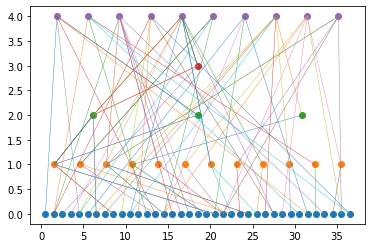

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 7, 0, 7, 7, 0, 7, 7, 7, 7, 0, 0, 1, 1, 2, 1, 2, 2,
       1, 7, 9, 1, 7, 9, 7, 7, 9, 7, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 4, 9, 9, 7, 2, 7, 4, 9, 2,
       2, 9, 0, 9, 7, 7, 7, 9, 7, 7, 7, 7, 6, 9, 7, 6, 6, 9, 9, 4, 9, 9,
       6, 9, 6, 1, 2, 6, 1, 6, 6, 6, 8, 5, 5, 6, 9, 6, 6, 6, 6, 6, 1, 6,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 9, 7, 2, 7, 7, 7, 2, 9, 0, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4666666666666667

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[ 9  0  0  1  0  0  0  0  0  1]
 [ 0  6  0  0  0  2  2  0  0  0]
 [ 0  3 17  7  0  1  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  4 11 16  0  0  0]
 [ 7  7  0  2  8  0  0 19 15  2]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  3  0  6  7  1  0  0  1 14]]


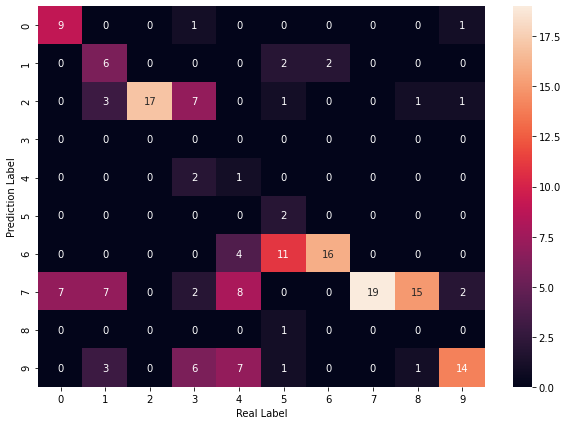

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [37, 12, 3, 1, 10]


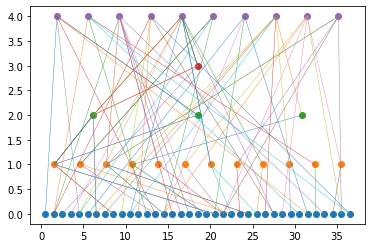

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

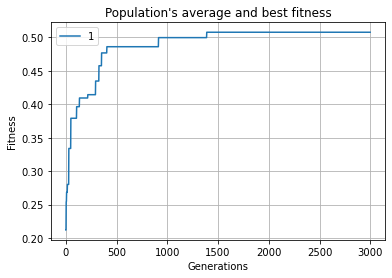

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [37, 12, 3, 1, 10]
Total nodes:63 Total connections::101
